Using TensorFlow backend.


(50000, 28, 28) (50000,)


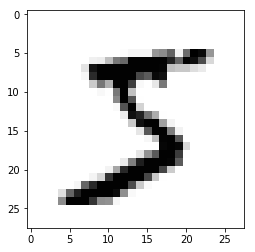

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
print (X_train.shape)
print (y_train.shape)

(50000, 28, 28)
(50000,)


In [4]:
print (type(X_train))

<class 'numpy.ndarray'>


In [5]:
import numpy as np
print (np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [6]:
input_X = tf.placeholder(tf.float32,[None, 28,28], name = "input_X")
input_y = tf.placeholder(tf.int32,[None],name='input_y')

In [7]:
X = tf.reshape(input_X, [-1,784])

In [101]:
n_iters = 300
tf.set_random_seed(0)
np.random.seed(0)
#batch_size =256
lr = .05

In [102]:
# weights1 = tf.Variable(tf.truncated_normal([784,300]))
# bias1 = tf.Variable(tf.zeros([300]))
# weights2 = tf.Variable(tf.truncated_normal([300,10]))
# bias2 = tf.Variable(tf.zeros([10]))

# Y1= tf.nn.relu(tf.matmul(X, weights1)+bias1)
# logits = tf.matmul(Y1, weights2) + bias2
# probability_y = tf.nn.softmax(logits)
# cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=input_y, logits= logits))
# is_correct_prediction = tf.equal(tf.cast(tf.argmax(probability_y,1), dtype = tf.int32), input_y)
# accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
# optimizer = tf.train.AdamOptimizer(learning_rate= lr).minimize(cross_entropy)


#### Define Model

In [103]:
w1 = tf.Variable(tf.truncated_normal([784,300]))
b1 = tf.Variable(tf.zeros([300]))

w2 = tf.Variable(tf.truncated_normal([300,50]))
b2 = tf.Variable(tf.zeros([50]))

w3 = tf.Variable(tf.truncated_normal([50,10]))
b3 = tf.Variable(tf.zeros([10]))

Y1= tf.nn.sigmoid(tf.matmul(X, w1)+b1)
Y2= tf.nn.sigmoid(tf.matmul(Y1, w2)+b2)
logits = tf.nn.sigmoid(tf.matmul(Y2, w3)+b3)

probability_y = tf.nn.softmax(logits)

cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=input_y, logits= logits))

is_correct_prediction = tf.equal(tf.cast(tf.argmax(probability_y,1), dtype = tf.int32), input_y)
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

optimizer = tf.train.AdamOptimizer(learning_rate= lr).minimize(cross_entropy)

In [104]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [105]:
train_loss_arr = []
train_acc_arr = []
v_loss_arr = []
v_acc_arr = []

#### Train Model

In [106]:
for i in range(n_iters):
    ## not the best way to make batches. Ideally an interator so that all samples are presented at least once
    s = np.random.choice(X_train.shape[0], batch_size)
    batch_X = X_train[s]
    batch_y = y_train[s]
    
    #training
    sess.run(optimizer, feed_dict={input_X: X_train, input_y: y_train})
    
    #evaluation. computing training and test metrics per epoch
    train_loss, train_acc  = sess.run([cross_entropy, accuracy], feed_dict={input_X: X_train, input_y: y_train})
    v_loss, v_acc = sess.run([cross_entropy, accuracy], feed_dict={input_X: X_val, input_y: y_val})
    if i%10 == 0:
        print ("Iteration %d"%i)
        print ("Train Loss: %f, Train Accuracy: %f"%(train_loss, train_acc))
        print ("Validation Loss: %f, Validation Accuracy: %f"%(v_loss, v_acc))
        print ("")
    train_loss_arr.append(train_loss)
    train_acc_arr.append(train_acc)
    v_loss_arr.append(v_loss)
    v_acc_arr.append(v_acc)
    #print("train auc:", roc_auc_score(y_train,predicted_y))
    

Iteration 0
Train Loss: 2.266217, Train Accuracy: 0.243920
Validation Loss: 2.260512, Validation Accuracy: 0.259500

Iteration 10
Train Loss: 1.691557, Train Accuracy: 0.780160
Validation Loss: 1.681459, Validation Accuracy: 0.796100

Iteration 20
Train Loss: 1.584670, Train Accuracy: 0.886160
Validation Loss: 1.576230, Validation Accuracy: 0.896300

Iteration 30
Train Loss: 1.542929, Train Accuracy: 0.921640
Validation Loss: 1.538471, Validation Accuracy: 0.926900

Iteration 40
Train Loss: 1.521546, Train Accuracy: 0.939280
Validation Loss: 1.521986, Validation Accuracy: 0.938600

Iteration 50
Train Loss: 1.508580, Train Accuracy: 0.952120
Validation Loss: 1.514084, Validation Accuracy: 0.944900

Iteration 60
Train Loss: 1.500093, Train Accuracy: 0.961080
Validation Loss: 1.508727, Validation Accuracy: 0.951400

Iteration 70
Train Loss: 1.494151, Train Accuracy: 0.967500
Validation Loss: 1.505423, Validation Accuracy: 0.955100

Iteration 80
Train Loss: 1.489763, Train Accuracy: 0.9724

#### Evaluation plots

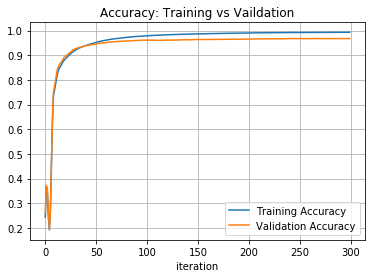

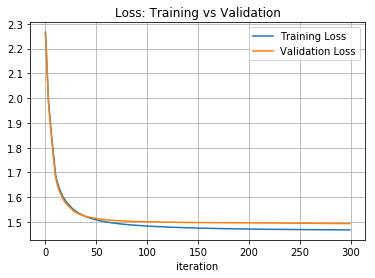

In [107]:
plt.title("Accuracy: Training vs Vaildation")
plt.plot(train_acc_arr,label="Training Accuracy")
plt.plot(v_acc_arr,label ="Validation Accuracy")
plt.xlabel("iteration")
plt.legend(loc=4)
plt.grid(True)
plt.show()


# loss training vs testing dataset
plt.title("Loss: Training vs Validation")
plt.plot(train_loss_arr,label="Training Loss")
plt.plot(v_loss_arr,label="Validation Loss")
plt.xlabel("iteration")
plt.legend(loc=1)
plt.grid(True)
plt.show()

#### Calculate test accuracy

In [108]:
predicted_test, test_acc = sess.run([probability_y, accuracy], feed_dict={input_X: X_test, input_y: y_test})

In [109]:
print("Test Accuracy: %f"%test_acc)

Test Accuracy: 0.963800
